In [1]:
import raster
import wireframe
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import transformation
import camera_persp.camera as cam

In [2]:
def extract_polygon(edges):
    poly = []
    verts = []
    counter = 0
    for vec3d in edges:
        p1 = vec3d[0]
        verts.append(p1)
        counter += 1

        if counter == edges.sep():
            poly.append(verts)
            verts = []
            counter = 0
    return poly

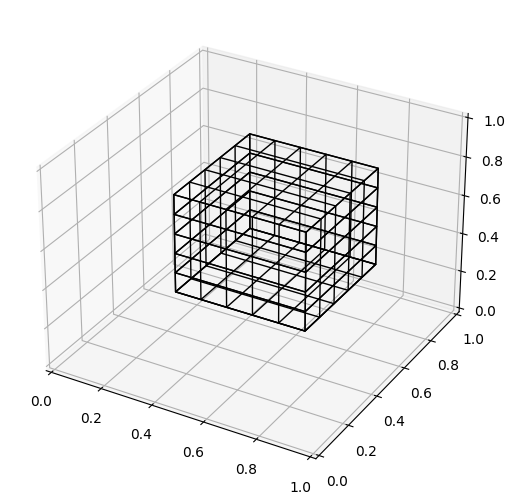

In [3]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

edges = wireframe.cube(.5, res=.5)
edges = transformation.translate_edges(edges, (-.2, -.2, -.2))

poly = extract_polygon(edges)

ax.add_collection3d(Poly3DCollection(poly, linewidths=1, alpha=0, edgecolors="black"))
plt.show()

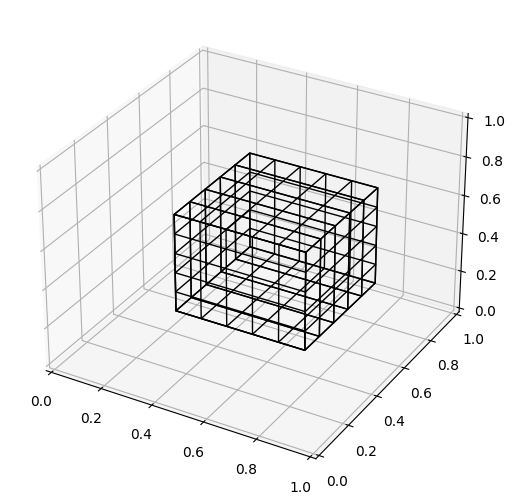

In [15]:
# Setup Camera
at = (0, 0, 0)
eye = (1, 0, 0)
camera = cam.get_camera(at, eye)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

edges = wireframe.cube(.5, res=.5)
edges = transformation.translate_edges(edges, (-.2, -.2, -.2))
edges = cam.edges_to_camera(edges, camera, eye)

poly = extract_polygon(edges)

ax.add_collection3d(Poly3DCollection(poly, linewidths=1, alpha=0, edgecolors="black"))
plt.show()